# REGRESIÓN LINEAL MULTIPLE PARA DATASET DE PENGUINS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## ELIMINAMOS NULOS

In [3]:
penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## CORRELACIÓN DE VARIABLES

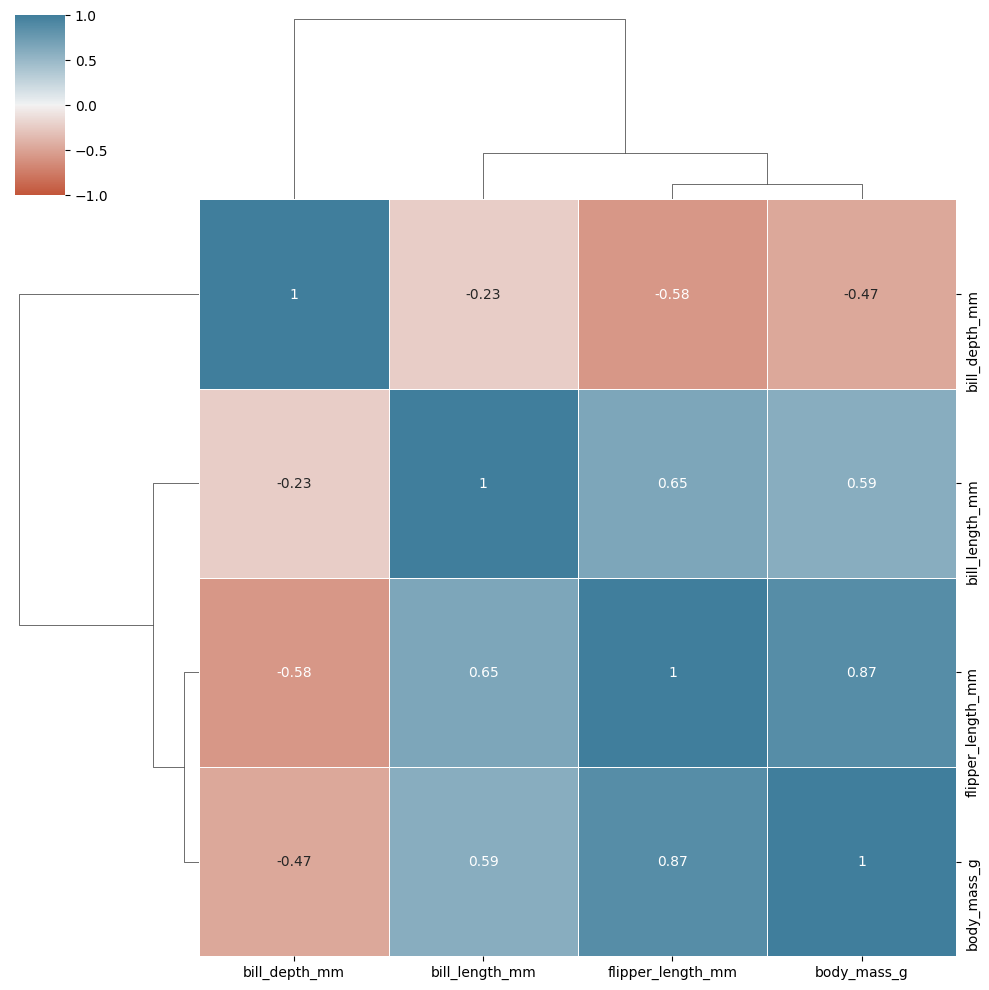

In [ ]:
sns.clustermap(
    data=penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

## REGRESIÓN LINEAL MULTIPLE

In [4]:
import statsmodels.formula.api as smf

In [24]:
model_1 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm",
        data=penguins_df
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          3.13e-105
Time:                        03:38:03   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm",
        data=penguins_df
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          9.26e-103
Time:                        03:24:32   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## AGREGAMOS UNA VARIABLE CATEGORICA A LA FORMULA

In [9]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(sex)",
        data=penguins_df
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          6.28e-122
Time:                        03:26:24   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(sex) + C(species)",
        data=penguins_df
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          6.82e-144
Time:                        03:27:19   Log-Likelihood:                -2354.0
No. Observations:                 333   AIC:                             4722.
Df Residuals:                     326   BIC:                             4749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1460.9946    571.308     -2.557      0.011   -2584.911    -337.079
C(sex)[T.Male]            389.8915     47.848      8.148      0.000     295.761     484.022
C(species)[T.Chinstrap]  -251.4767     81.079     -3.102      0.002    -410.980     -91.973
C(species)[T.Gentoo]     1014.6267    129.561      7.831      0.000     759.746    1269.507
flipper_length_mm          15.9502      2.910      5.482      0.000      10.226      21.674
bill_length_mm             18.2044      7.106      2.562      0.011       4.225      32.184
bill_depth_mm              67.2176     19.742      3.405      0.001      28.380     106.055
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.871
Skew:                           0.124   Prob(JB):                        0.647
Kurtosis:                       2.959   Cond. No.                     7.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(sex) + C(species) + C(island)",
        data=penguins_df
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     284.1
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          1.85e-141
Time:                        03:27:54   Log-Likelihood:                -2353.6
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     324   BIC:                             4760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1500.0291    575.822     -2.605      0.010   -2632.852    -367.207
C(sex)[T.Male]            387.2243     48.138      8.044      0.000     292.521     481.927
C(species)[T.Chinstrap]  -260.3063     88.551     -2.940      0.004    -434.513     -86.100
C(species)[T.Gentoo]      987.7614    137.238      7.197      0.000     717.771    1257.752
C(island)[T.Dream]        -13.1031     58.541     -0.224      0.823    -128.271     102.065
C(island)[T.Torgersen]    -48.0636     60.922     -0.789      0.431    -167.915      71.788
flipper_length_mm          16.2385      2.939      5.524      0.000      10.456      22.021
bill_length_mm             18.1893      7.136      2.549      0.011       4.150      32.229
bill_depth_mm              67.5754     19.821      3.409      0.001      28.581     106.570
==============================================================================
Omnibus:                        1.114   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.101
Skew:                           0.139   Prob(JB):                        0.577
Kurtosis:                       2.958   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_6 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex) + C(species)",
        data=penguins_df
    )
    .fit()
)
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     534.0
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          3.37e-142
Time:                        03:28:52   Log-Likelihood:                -2364.4
No. Observations:                 333   AIC:                             4739.
Df Residuals:                     328   BIC:                             4758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -365.8174    532.050     -0.688      0.492   -1412.479     680.844
C(sex)[T.Male]            530.3811     37.810     14.027      0.000     456.000     604.762
C(species)[T.Chinstrap]   -87.6345     46.347     -1.891      0.060    -178.810       3.541
C(species)[T.Gentoo]      836.2600     85.185      9.817      0.000     668.681    1003.839
flipper_length_mm          20.0249      2.846      7.037      0.000      14.427      25.623
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.556
Skew:                           0.094   Prob(JB):                        0.459
Kurtosis:                       2.723   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model_7 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex) + C(species) + C(island)",
        data=penguins_df
    )
    .fit()
)
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     354.7
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          1.27e-139
Time:                        03:29:51   Log-Likelihood:                -2364.0
No. Observations:                 333   AIC:                             4742.
Df Residuals:                     326   BIC:                             4769.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -390.0077    535.239     -0.729      0.467   -1442.966     662.951
C(sex)[T.Male]            528.2987     37.990     13.906      0.000     453.563     603.035
C(species)[T.Chinstrap]   -83.2594     56.376     -1.477      0.141    -194.165      27.646
C(species)[T.Gentoo]      798.3426     96.852      8.243      0.000     607.808     988.877
C(island)[T.Dream]        -36.0919     59.979     -0.602      0.548    -154.087      81.903
C(island)[T.Torgersen]    -51.1214     62.648     -0.816      0.415    -174.367      72.124
flipper_length_mm          20.3157      2.876      7.064      0.000      14.658      25.974
==============================================================================
Omnibus:                        1.630   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.606
Skew:                           0.098   Prob(JB):                        0.448
Kurtosis:                       2.722   Cond. No.                     6.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## COMPARAMOS LOS MODELOS

In [25]:
model_1_predict = model_1.predict(penguins_df)
model_2_predict = model_2.predict(penguins_df)
model_3_predict = model_3.predict(penguins_df)
model_4_predict = model_4.predict(penguins_df)
model_5_predict = model_5.predict(penguins_df)
model_6_predict = model_6.predict(penguins_df)
model_7_predict = model_7.predict(penguins_df)

In [26]:
dic_predict = {
    'actual_value':penguins_df.body_mass_g,
    'model_1_predict':model_1_predict,
    'model_2_predict':model_2_predict,
    'model_3_predict':model_3_predict,
    'model_4_predict':model_4_predict,
    'model_5_predict':model_5_predict,
    'model_6_predict':model_6_predict,
    'model_7_predict':model_7_predict
}

models_result = pd.DataFrame(dic_predict)
models_result

,actual_value,model_1_predict,model_2_predict,model_3_predict,model_4_predict,model_5_predict,model_6_predict,model_7_predict
0,3750.0,3205.648453,3204.761227,3579.136946,3784.654450,3753.163896,3789.073338,3764.316641
1,3800.0,3456.414782,3436.701722,3343.220772,3394.413006,3366.559840,3358.816820,3337.596610
2,3250.0,3907.794176,3906.897032,3639.137335,3592.859351,3567.803105,3539.041059,3520.438177
4,3450.0,3807.487644,3816.705772,3457.954243,3582.805840,3557.692616,3498.991228,3479.806717
5,3650.0,3657.027846,3696.168128,3764.536023,4059.561060,4031.341630,3969.297576,3947.158208
...,...,...,...,...,...,...,...,...
338,4925.0,4860.706229,4817.401804,4730.939522,4747.115438,4747.091721,4755.774460,4755.901047
340,4850.0,4910.859495,4877.548625,4719.043886,4796.114493,4796.599759,4775.799376,4776.216777
341,5750.0,5261.932356,5269.708799,5402.946434,5457.298374,5457.580693,5446.354878,5446.725564
342,5200.0,4760.399697,4728.911846,4563.248182,4752.745484,4752.569051,4715.724630,4715.269588


## GRAFICAMOS LOS RESULTADOS

In [27]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

<Axes: ylabel='Proportion'>

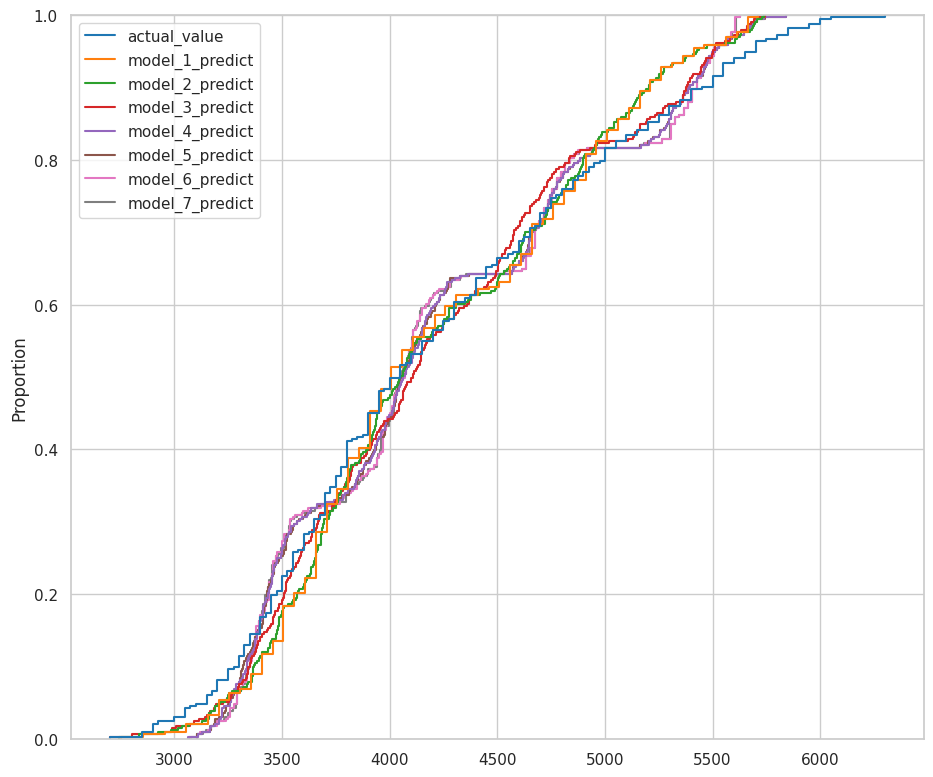

In [28]:
sns.ecdfplot(
    data=models_result
)

<Axes: ylabel='Proportion'>

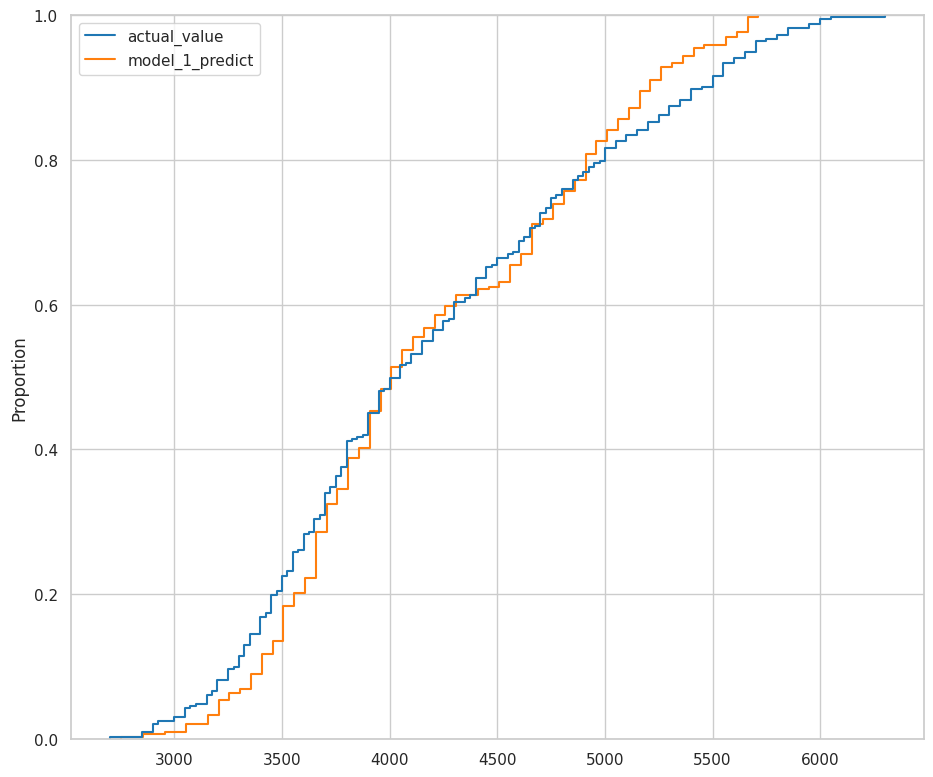

In [29]:
sns.ecdfplot(data=models_result[['actual_value','model_1_predict']])

<Axes: ylabel='Density'>

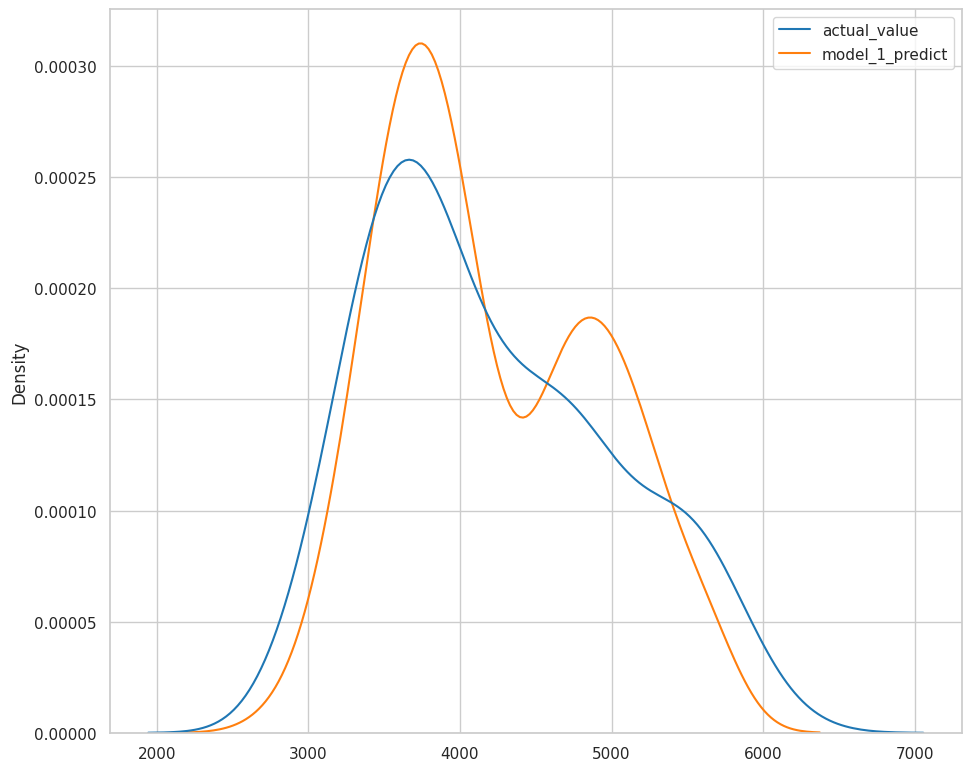

In [30]:
sns.kdeplot(data=models_result[['actual_value','model_1_predict']])

<Axes: ylabel='Proportion'>

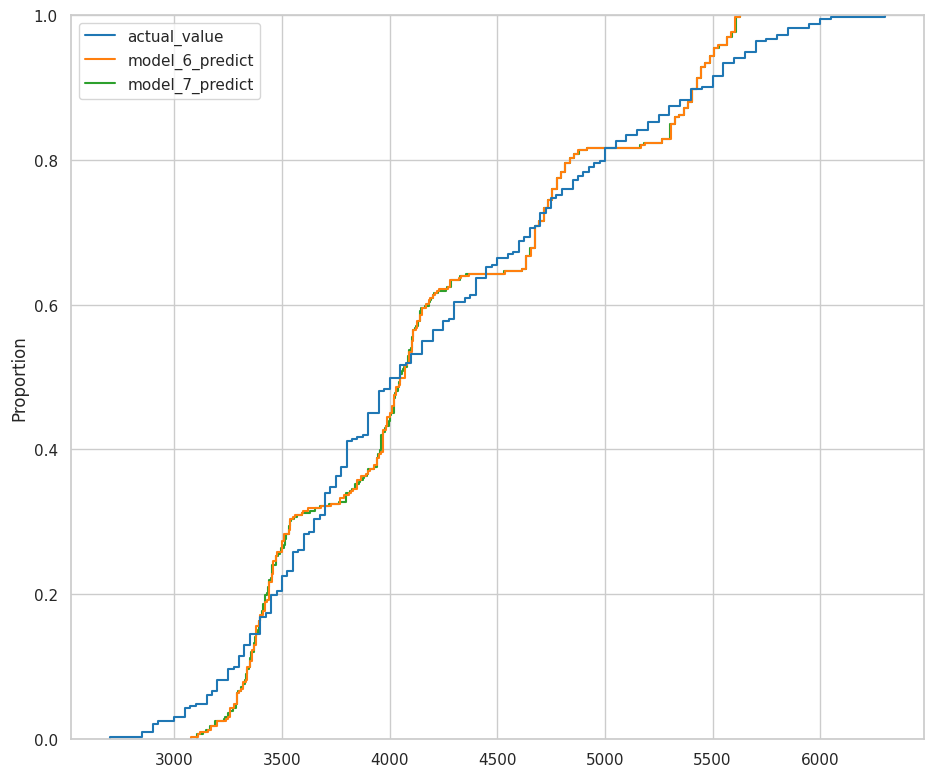

In [23]:
sns.ecdfplot(data=models_result[['actual_value','model_6_predict','model_7_predict']])

<Axes: ylabel='Density'>

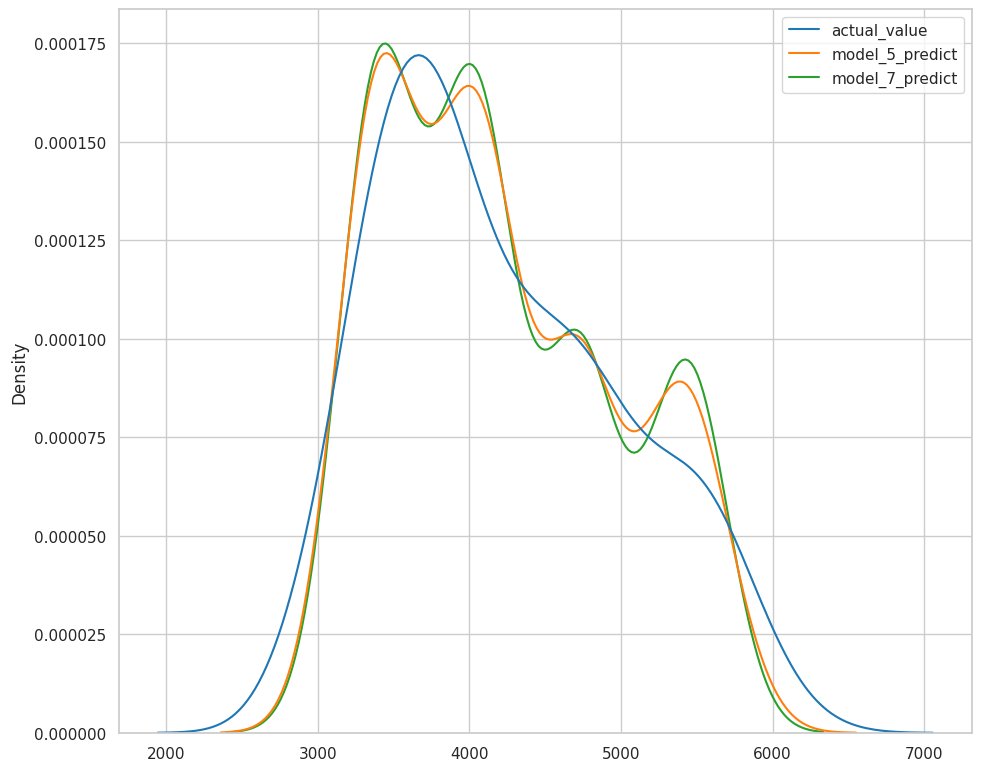

In [32]:
sns.kdeplot(data=models_result[['actual_value','model_5_predict','model_7_predict']])